**Installing Packages**

In [ ]:
!pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Making Necessary Imports**

In [ ]:
import numpy as np
import pandas as pd
import time
import re
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from IPython.display import Image
import pydot
from tqdm import tqdm_notebook
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix,classification_report
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import scipy
from statistics import mode
from scipy.spatial import distance
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random
import collections
import os
import glob
import shutil
import python_speech_features as mfcc
from scipy.io import wavfile
from matplotlib import pyplot as plt
from google.colab import drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Loading Mnist Digit dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

**Data preprocessing**

In [ ]:
X_train = X_train[0:3000].astype('float32')
y_train = y_train[0:3000]
X_test = X_test[0:500].astype('float32')
y_test = y_test[0:500]
X_train /=255
X_test /=255

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(3000, 28, 28) (3000,) (500, 28, 28) (500,)


**Manhattan Distance**

In [ ]:
def diff(x,y):
  return sum(sum(abs(np.subtract(x,y))))

In [ ]:
def dist_calculator(train,test):
  ans = []
  for i in test:
    a = []
    for j in train:
      a.append(diff(j,i))
    ans.append(a)
  return ans

**KNN Algorithm**

In [ ]:
def KNN(k,train,test,dist):
    d = dist(train,test)
    m= []
    for i in range(len(d)):
        sorted_index= np.argsort(d[i])
        top_k= sorted_index[0:k]
        top_k_label = y_train[top_k]
        m.append(mode(top_k_label))
    return m

**Predictions**

In [ ]:
pred = []
for i in range(1,11):
  pred.append(KNN(i,X_train,X_test,dist_calculator))

**Results**

In [ ]:
accuracy = []
for i in range(10):
  accuracy.append(accuracy_score(y_test,pred[i]))

In [ ]:
f1 = []
for i in range(10):
  f1.append(f1_score(y_test, pred[i],  average='macro'))

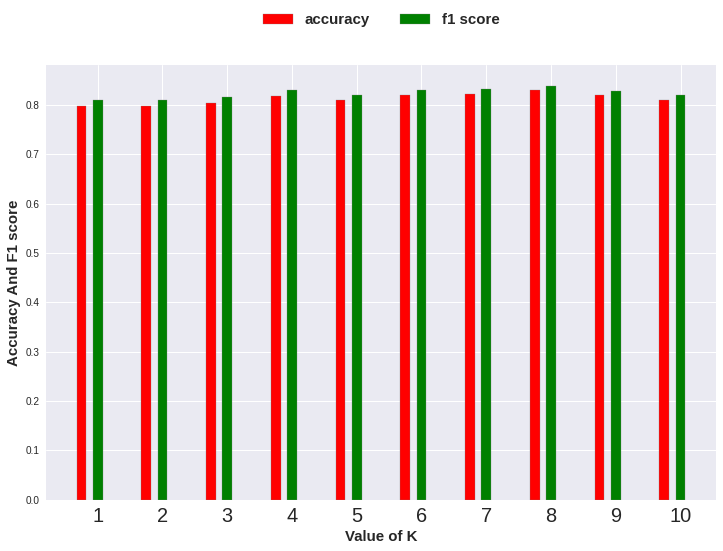

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, accuracy, color ='r', width = 0.15,
        edgecolor ='grey', label ='accuracy')

plt.bar(br2, f1, color ='g', width = 0.15,
        edgecolor ='grey', label ='f1 score')
 
# Adding Xticks
plt.xlabel('Value of K', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy And F1 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(accuracy))],
        ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=20)
 

plt.legend(prop={'size':15, 'weight':'bold'}, loc='upper center', bbox_to_anchor =(0.50, 1.15), ncol=3, fancybox=True)
plt.show()

**Mounting drive**

In [ ]:
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


**Unzipping Dataset**

In [ ]:
!unzip -o -q "/drive/MyDrive/sentiment analysis/archive.zip" -d "/content/data/"

**Reading dataset**

In [ ]:
data = pd.read_csv('/content/data/SPAM text message 20170820 - Data.csv')

In [ ]:
data = data[data['Category'].notna()]

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sentence = []
for i in data['Message']:
    sentence.append(i)
label = []
for i in data['Category']:
    label.append(i)

**Cleaning Data**

In [ ]:
def cleaner(tweets):
  for i in range(len(tweets)):
      tweets[i] = re.sub(r'[0-9]', "", tweets[i])
      tweets[i] = re.sub(r'http\S+', "", tweets[i])
      tweets[i] = re.sub(r'#', "", tweets[i])
      tweets[i] = re.sub(r'@\S+', "", tweets[i])
      tweets[i] = re.sub(r'[^\w\s]', "", tweets[i])
      tweets[i] = re.sub(' +', ' ',tweets[i]);
      tweets[i] = tweets[i].lower()
      tweets[i] = re.sub(r'^\s+|\s+$' ,'',tweets[i])
      filtered_list = []
      stop_words = nltk.corpus.stopwords.words('english')
      words = word_tokenize(tweets[i])
      for w in words:
          if w.lower() not in stop_words:
              filtered_list.append(w)
      my_clean_txt = " ".join(filtered_list)
      tweets[i] = my_clean_txt

In [ ]:
r = random.randint(0,5570)
print(sentence[r])
cleaner(sentence)
print(sentence[r])

You have an important customer service announcement from PREMIER.
important customer service announcement premier


In [ ]:
X_train = sentence[0:5000]
y_train = label[0:5000]
X_test = sentence[5001:]
y_test = label[5001:]

**Making Vocabulary**

In [ ]:
vc1 = []
vc2 = []
for i in range(len(X_train)):
    vc1.append(X_train[i].split())
for i in range(len(X_test)):
    vc2.append(X_test[i].split())
boW = [i for w in vc1 for i in w]
vocab= list(set(boW))

In [ ]:
len(vocab)

8011

**Bag of Words**

In [ ]:
index_word = {}
i = 0
for word in vocab:
    index_word[word] = i 
    i += 1

In [ ]:
def Bag_Of_Words(sentence):
    count_dict = collections.defaultdict(int)
    f = [0]*len(vocab)
    for word in sentence:
        if word not in sentence:
            continue
        count_dict[word] += 1
    for key,word in count_dict.items():
        if key not in index_word:
            continue
        f[index_word[key]] = word
    return f

In [ ]:
train = []
for i in range(len(vc1)):
    train.append(Bag_Of_Words(vc1[i]))
test = []
for i in range(len(vc2)):
    test.append(Bag_Of_Words(vc2[i]))

In [ ]:
X_train = np.array(train)
y_train = np.array(y_train)
X_test = np.array(test)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5000, 8011)
(5000,)
(571, 8011)
(571,)


**Euclidean Distance**

In [ ]:
def dist_calculator(train,test):
    return distance.cdist(test,train,'euclidean')

**Predictions**

In [ ]:
pred = []
for i in range(1,11):
  pred.append(KNN(i,X_train,X_test,dist_calculator))

**Results**

In [ ]:
accuracy = []
for i in range(10):
  accuracy.append(accuracy_score(y_test,pred[i]))

In [ ]:
f1 = []
for i in range(10):
  f1.append(f1_score(y_test, pred[i],  average='macro'))

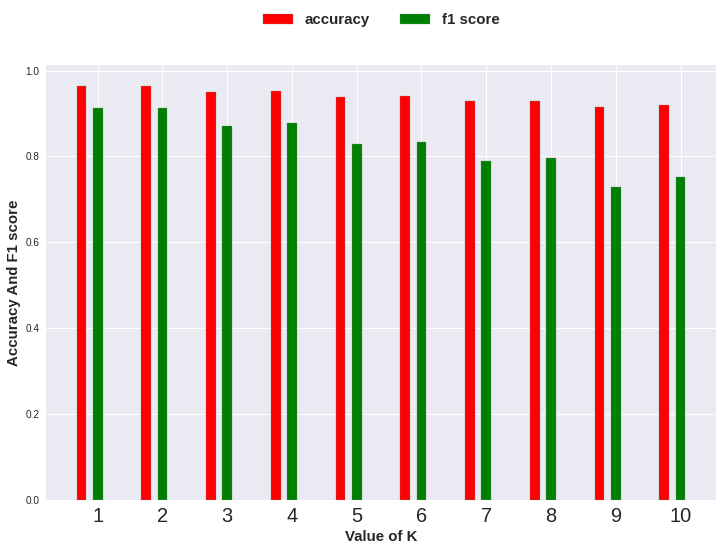

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, accuracy, color ='r', width = 0.15,
        edgecolor ='grey', label ='accuracy')

plt.bar(br2, f1, color ='g', width = 0.15,
        edgecolor ='grey', label ='f1 score')
 
# Adding Xticks
plt.xlabel('Value of K', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy And F1 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(accuracy))],
        ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=20)
 

plt.legend(prop={'size':15, 'weight':'bold'}, loc='upper center', bbox_to_anchor =(0.50, 1.15), ncol=3, fancybox=True)
plt.show()

**unzipping**

In [ ]:
!unzip -o -q "/drive/MyDrive/Mnist audio/recordings.zip" -d "/content/data/"

In [ ]:
dataset = []
for filename in glob.glob(os.path.join('/content/data/recordings', '*.wav')):
  dataset.append(filename)

In [ ]:
random.shuffle(dataset)

In [ ]:
label = []
for i in range(len(dataset)):
  label.append(int(dataset[i].split('/')[-1].split('_')[0]))

**Reading dataset**

In [ ]:
def readwav(dataset):
  audio = []
  sr = []
  for i in range(len(dataset)):
    samplerate, data = wavfile.read(dataset[i])
    audio.append(data)
    sr.append(samplerate)
  return audio,sr

**Extracting mfcc features**

In [ ]:
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [ ]:
def get_feature(audio,sr):
    feature = []
    for i in range(len(audio)):
        feature.append(get_MFCC(audio[i], sr[i]))
    return feature

In [ ]:
X_train = dataset[0:2600]
y_train = label[0:2600]
X_test = dataset[2601:]
y_test = label[2601:]

In [ ]:
X_train_audio,X_train_sr = readwav(X_train)
X_test_audio,X_test_sr = readwav(X_test)

In [ ]:
X_train = get_feature(X_train_audio, X_train_sr)
X_test = get_feature(X_test_audio, X_test_sr)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2600, 13)
(2600,)
(399, 13)
(399,)


**Predictions**

In [ ]:
pred = []
for i in range(1,11):
  pred.append(KNN(i,X_train,X_test,dist_calculator))

**Results**

In [ ]:
accuracy = []
for i in range(10):
  accuracy.append(accuracy_score(y_test,pred[i]))

In [ ]:
f1 = []
for i in range(10):
  f1.append(f1_score(y_test, pred[i],  average='macro'))

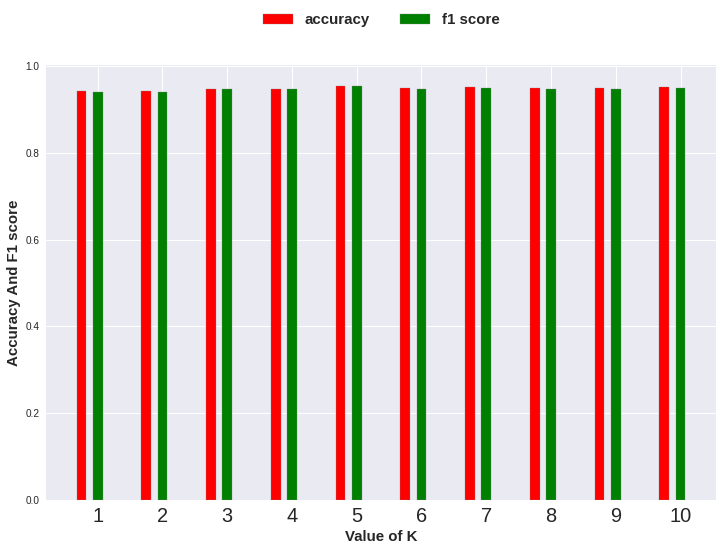

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, accuracy, color ='r', width = 0.15,
        edgecolor ='grey', label ='accuracy')

plt.bar(br2, f1, color ='g', width = 0.15,
        edgecolor ='grey', label ='f1 score')
 
# Adding Xticks
plt.xlabel('Value of K', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy And F1 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(accuracy))],
        ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=20)
 

plt.legend(prop={'size':15, 'weight':'bold'}, loc='upper center', bbox_to_anchor =(0.50, 1.15), ncol=3, fancybox=True)
plt.show()